# 2D Lid-driven cavity flow

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the parameters
Lx, Ly = 1.0, 1.0  # Domain size
nx, ny = 101, 101  # Number of grid points
dx, dy = Lx/(nx-1), Ly/(ny-1)  # Grid spacing
Re = 100.0  # Reynolds number
dt = 0.001  # Time step
T = 10.0  # Final time

In [3]:
# Setup the computational grid
x = np.linspace(0.0, Lx, nx)
y = np.linspace(0.0, Ly, ny)
X, Y = np.meshgrid(x, y)

In [4]:
# Initial conditions for velocity (u & v) and pressure (p)
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))

In [5]:
# Set the boundary conditions
u[:, 0] = 0.0  # Left wall
u[:, -1] = 0.0  # Right wall
u[0, :] = 0.0  # Bottom wall
u[-1, :] = 1.0  # Top wall
v[:, 0] = 0.0  # Left wall
v[:, -1] = 0.0  # Right wall
v[0, :] = 0.0  # Bottom wall
v[-1, :] = 0.0  # Top wall

In [6]:
# Navier-Stokes Solver
for n in range(int(T/dt)):
    # Pressure Poisson equation
    b = np.zeros((ny, nx))
    b[1:-1, 1:-1] = (1.0/dt)*((u[1:-1, 2:]-u[1:-1, 0:-2])/(2.0*dx) + 
                               (v[2:, 1:-1]-v[0:-2, 1:-1])/(2.0*dy))
    for q in range(100):
        pn = p.copy()
        p[1:-1, 1:-1] = ((pn[1:-1, 2:]+pn[1:-1, 0:-2])*dy**2 +
                         (pn[2:, 1:-1]+pn[0:-2, 1:-1])*dx**2 -
                         b[1:-1, 1:-1]*dx**2*dy**2)/(2.0*(dx**2+dy**2))
        p[:, -1] = p[:, -2]  # Right wall
        p[0, :] = p[1, :]  # Bottom wall
        p[:, 0] = p[:, 1]  # Left wall
        p[-1, :] = p[-2, :]  # Top wall

    # Velocity update
    u[1:-1, 1:-1] = (u[1:-1, 1:-1] -
                     u[1:-1, 1:-1]*dt/dx*(u[1:-1, 1:-1]-u[1:-1, 0:-2]) -
                     v[1:-1, 1:-1]*dt/dy*(u[1:-1, 1:-1]-u[0:-2, 1:-1]) -
                     dt/(2.0*Re*dx)*(p[1:-1, 2:]-p[1:-1, 0:-2]) +
                     dt/Re*(u[1:-1, 2:]-2.0*u[1:-1, 1:-1]+u[1:-1, 0:-2])/dx**2 +
                     dt/Re*(u[2:, 1:-1]-2.0*u[1:-1, 1:-1]+u[0:-2, 1:-1])/dy**2)
    v[1:-1, 1:-1] = (v[1:-1, 1:-1] -
                     u[1:-1, 1:-1]*dt/dx*(v[1:-1, 1:-1]-v[1:-1, 0:-2]) -
                     v[1:-1, 1:-1]*dt/dy*(v[1:-1, 1:-1]-v[0:-2, 1:-1]) -
                     dt/(2.0*Re*dy)*(p[2:, 1:-1]-p[0:-2, 1:-1]) +
                     dt/Re*(v[1:-1, 2:]-2.0*v[1:-1, 1:-1]+v[1:-1, 0:-2])/dx**2 +
                     dt/Re*(v[2:, 1:-1]-2.0*v[1:-1, 1:-1]+v[0:-2, 1:-1])/dy**2)

    # Boundary conditions
    u[:, 0] = 0.0  # Left wall
    u[:, -1] = 0.0  # Right wall
    u[0, :] = 0.0  # Bottom wall
    u[-1, :] = 1.0  # Top wall
    v[:, 0] = 0.0  # Left wall
    v[:, -1] = 0.0  # Right wall
    v[0, :] = 0.0  # Bottom wall
    v[-1, :] = 0.0  # Top wall

/var/folders/ns/95vk77k555xd61n__6ffnkpc0000gn/T/ipykernel_79096/4104634434.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, np.sqrt(u**2 + v**2), cmap='GnBu_r')


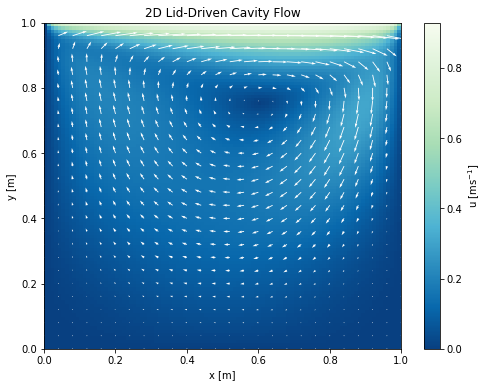

In [7]:
# Plotting
fig = plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, np.sqrt(u**2 + v**2), cmap='GnBu_r')
colorbar = plt.colorbar()
colorbar.set_label('u [ms$^{-1}$]')
skip = (slice(None, None, 4), slice(None, None, 4))
plt.quiver(X[skip], Y[skip], u[skip], v[skip], color='white')
plt.title('2D Lid-Driven Cavity Flow')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()